In [15]:
import pandas as pd

# Update the path to the CSV file
df = pd.read_csv('/content/traffic_data.csv')
df.head()

,origin,destination,distance_meters,duration_seconds,duration_in_traffic_seconds,departure_time
0,"Ballygunge, Kolkata, West Bengal",Netaji Subhash Chandra Bose International Airp...,19955,2288,1916,2024-09-02 17:22:03
1,"Ballygunge, Kolkata, West Bengal",Netaji Subhash Chandra Bose International Airp...,19955,2288,1880,2024-09-02 18:22:03
2,"Ballygunge, Kolkata, West Bengal",Netaji Subhash Chandra Bose International Airp...,19955,2288,1774,2024-09-02 19:22:03
3,"Ballygunge, Kolkata, West Bengal",Netaji Subhash Chandra Bose International Airp...,19955,2288,1718,2024-09-02 20:22:03
4,"Ballygunge, Kolkata, West Bengal",Netaji Subhash Chandra Bose International Airp...,19955,2288,1668,2024-09-02 21:22:03


In [16]:
# Convert 'departure_time' to datetime and extract hour and day of the week
df['departure_time'] = pd.to_datetime(df['departure_time'])
df['hour'] = df['departure_time'].dt.hour
df['day_of_week'] = df['departure_time'].dt.dayofweek

# Check for missing values
df.isnull().sum()

# Drop rows with missing values, if any
df.dropna(inplace=True)

# Select the relevant features for training
X = df[['distance_meters', 'duration_in_traffic_seconds', 'hour', 'day_of_week']]
y = df['duration_seconds']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 40.1837606837607


In [19]:

import numpy as np

# Calculate Percentage Error
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
mean_percentage_error = np.mean(percentage_errors)
print(f"Mean Percentage Error: {mean_percentage_error}%")


Mean Percentage Error: 1.137840453449931%


In [20]:
import joblib

# Save the model to a file
joblib.dump(model, 'duration_predictor_model.joblib')


['duration_predictor_model.joblib']

R² Score: 0.9990937628331833
     Expected  Predicted
383     13755   13755.00
422     14574   13755.00
90       1344    1342.83
472      2449    2413.29
523      4058    4058.00


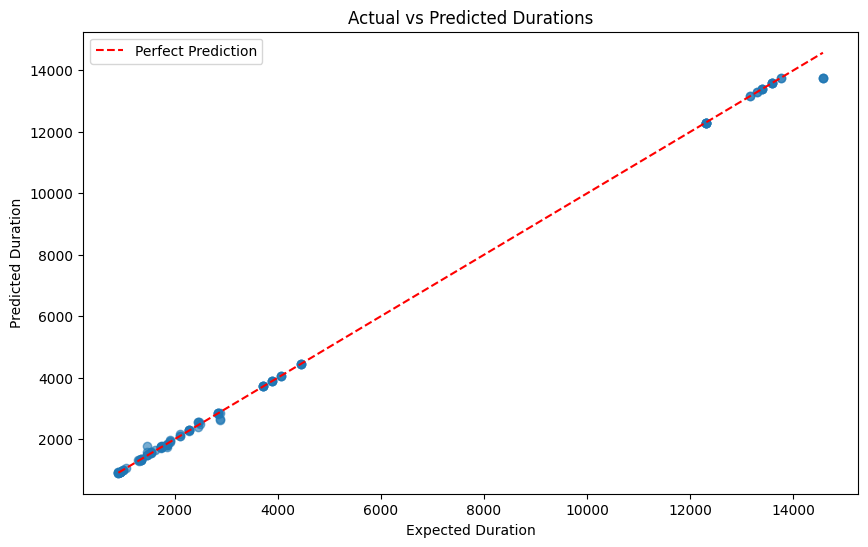

In [23]:

r2 = r2_score(y_test, y_pred)

results_df = pd.DataFrame({'Expected': y_test, 'Predicted': y_pred})

print("R² Score:", r2)
print(results_df.head())

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Expected Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Durations')
plt.legend()
plt.show()
